In [1]:
import numpy as np
from librosa.core import stft
import Spectrogram
import matplotlib.pyplot as plt
from torch.nn.functional import conv1d

import torch

fs = 22050
s = np.linspace(0,10,fs*10)
x = np.sin(2*np.pi*50*s, dtype=np.float32) + np.sin(2*np.pi*100*s, dtype=np.float32) \
    + np.sin(2*np.pi*200*s, dtype=np.float32) + np.sin(2*np.pi*400*s, dtype=np.float32) \
    + np.sin(2*np.pi*800*s, dtype=np.float32) + np.sin(2*np.pi*1600*s, dtype=np.float32) \
    + np.sin(2*np.pi*3200*s, dtype=np.float32) + np.sin(2*np.pi*6400*s, dtype=np.float32) 

# nnAudiom

Text(0, 0.5, 'bins')

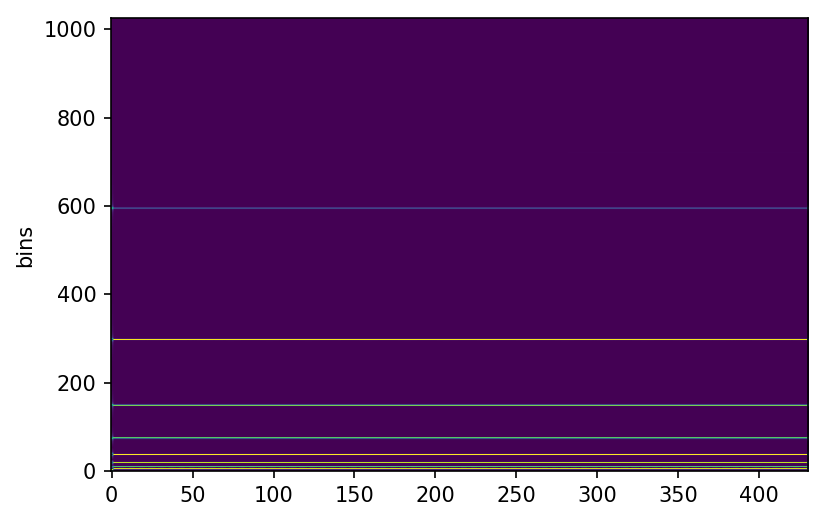

In [2]:
spec_layer = Spectrogram.STFT(hop_length=512, n_fft=2048, window='hann'
                                    , freq_scale='no')
spec = spec_layer(torch.tensor(x))
plt.figure(dpi=150) # Need a higher resolution to see the fine lines
plt.imshow(spec[0].numpy(), aspect='auto', origin='lower')
plt.ylabel("bins")

# Librosa

Text(0, 0.5, 'bins')

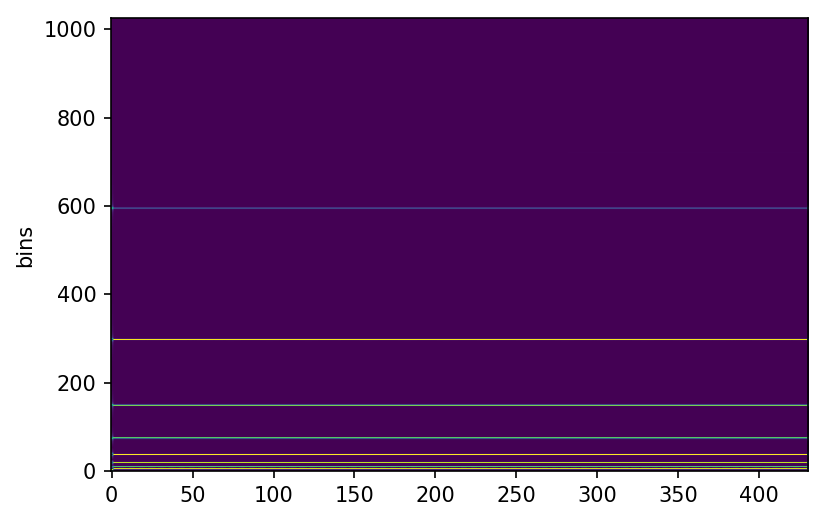

In [3]:
S_stft = np.abs(stft(x, hop_length=512, n_fft=2048, window='hann'))
plt.figure(dpi=150) # Need a higher resolution to see the fine lines
plt.imshow(S_stft, aspect='auto', origin='lower')
plt.ylabel("bins")

## Checking if the two implementations are the same

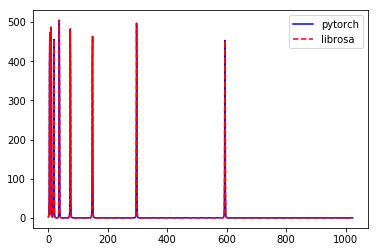

In [4]:
plt.plot(spec[0][:,10].numpy(), 'b')
plt.plot(S_stft[:,10], '--r')
plt.legend(['pytorch', 'librosa'])

In [5]:
np.allclose(S_stft, spec[0].numpy(),rtol=1e-4, atol=1e-4)

True

# Extra functions provided in nnAudio

## Setting the frequency range for the spectrogram for log freq scale

sampling rate = 22050. Please make sure the sampling rate is correct in order to get a valid freq range


Text(0, 0.5, 'freq (Hz)')

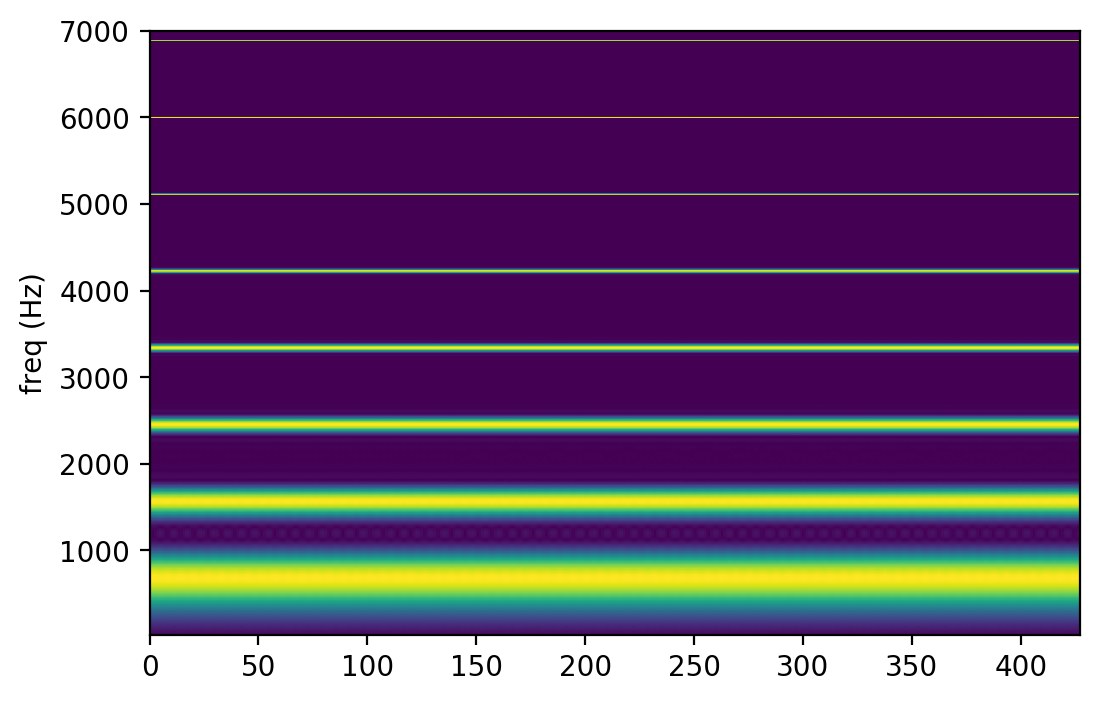

In [6]:
spec_layer = Spectrogram.STFT(hop_length=512, n_fft=2048,center=False, window='hann'
                                    , freq_scale='log', low=30, high=7000)
spec = spec_layer(torch.tensor(x))
plt.figure(dpi=200) # Need a higher resolution to see the fine lines
plt.imshow(spec[0].numpy(), aspect='auto', origin='lower',extent=[0,spec[0].shape[1],30,7000])
plt.ylabel("freq (Hz)")

## Setting the frequency range for the spectrogram for linear freq scale

In [7]:
spec[0].shape

torch.Size([1025, 427])

sampling rate = 22050. Please make sure the sampling rate is correct in order to get a valid freq range


Text(0, 0.5, 'freq (Hz)')

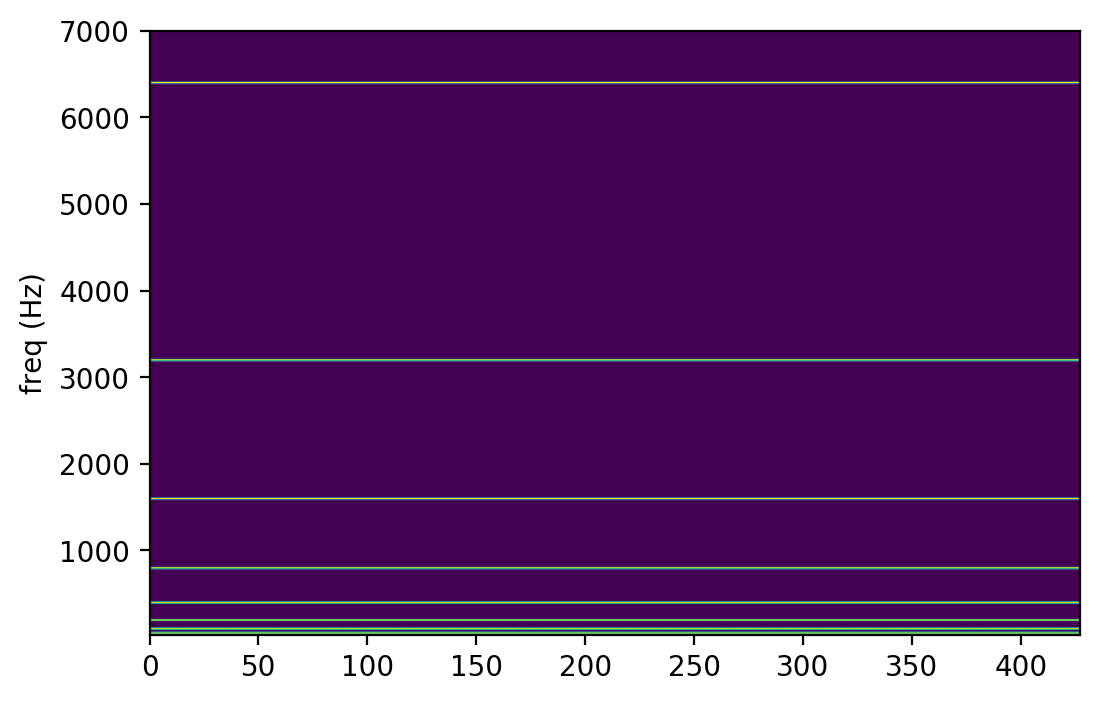

In [8]:
spec_layer = Spectrogram.STFT(hop_length=512, n_fft=2048,center=False, window='hann'
                                    , freq_scale='linear', low=30, high=7000)
plt.figure(dpi=200) # Need a higher resolution to see the fine lines
spec = spec_layer(torch.tensor(x))
plt.imshow(spec[0].numpy(), aspect='auto', origin='lower',extent=[0,spec[0].shape[1],30,7000])
plt.ylabel("freq (Hz)")